# Regression
(by Tevfik Aytekin)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
import math
import time
from tqdm import tqdm
import copy
from IPython import display
import pylab as pl



# IMPORTANT: You need to download the following file to your computer from here:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train = pd.read_csv("../datasets/house_prices/train.csv")
#train = pd.read_csv("train.csv")

In [63]:
train.shape

(1460, 81)

In [64]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


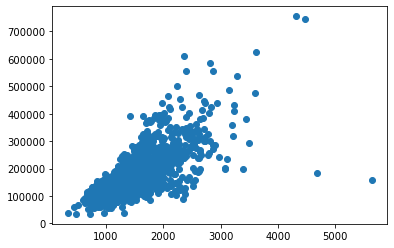

In [65]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

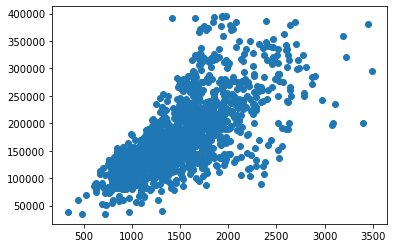

In [67]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

(257, 1) (257,)
(29, 1) (29,)


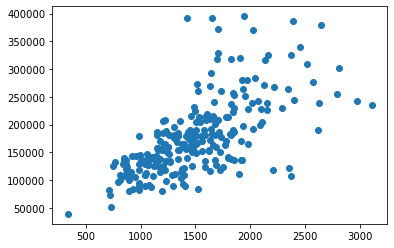

In [68]:
# Take a small sample of the data in order to work with nicer diagrams.
# Make a test / train split

train2 = train2.sample(frac=0.2)
X = train2[['GrLivArea']]
y = train2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

In [69]:
# fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

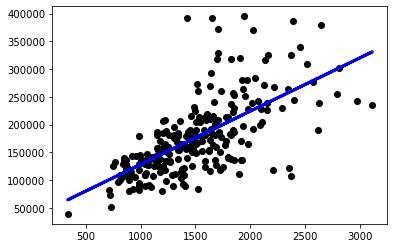

In [70]:
#Plot regression line on training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)


In [71]:
# Show the intercept and the coefficient of the model (which is a line)
print (model.intercept_)
print (model.coef_)

32557.996932653332
[95.85]


In [72]:
def predict(GrLivArea):
    return model.intercept_ + model.coef_*GrLivArea

In [75]:
predict(1000)

array([128409.84])

#### Can we interpret the above coefficient as increase in price per square feet?

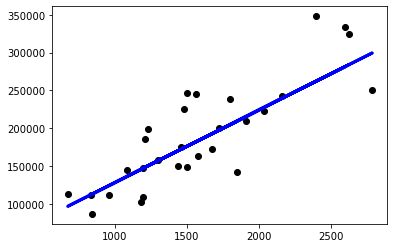

In [76]:
#Plot regression line on test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, test_predictions, color='blue', linewidth=3)

In [79]:
# training and test set mean absolute error (MAE)
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
# or
print(np.mean(np.abs(y_train - train_predictions)))

print("Test MAE:", mean_absolute_error(y_test, test_predictions))


Training MAE: 34771.36339730841
34771.36339730841
Test MAE: 29434.39786185651


In [80]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))

Test MAPE: 15.830847723988784


In [ ]:
print("r-squared:", model.score(X_test, y_test))

## The Coefficient of Determination, r-squared ($r^2$)

$r^2$, is the percentage of the dependent variable variation that a model explains. What does this mean? Baseline model predicts always the mean value (a horizontal line). We can find the SSE of the baseline model (call it MSSE). Find the SSE of the regression line (call it RSSE). 

$$r^2 = 1 - \frac{RSSE}{MSSE} = \frac{(MSSE - RSSE)}{MSSE}$$ 

$r^2$ compares the performance of the model with respect to baseline. If it is 0 it means the model performance is as bad as the baseline, if it is 1 it means that the model performance is perfect. 

What is the range of values can $r^2$ take? Can it be a negative value?

More information is [here](https://onlinecourses.science.psu.edu/stat501/node/255/)

$r$ in $r^2$ refers to Pearson's correlation coefficient. Relation between $r$ and $r^2$ is [here](http://www.win-vector.com/blog/2011/11/correlation-and-r-squared/)


In [81]:
# baseline - predict always the mean SalePrice value

mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
print("Baseline (mean) MAE:", mean_absolute_error(y_test, mean_array))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y_test, mean_array))


Baseline (mean) MAE: 55488.17227961894
Baseline (mean) MAPE: 30.790132822153403


In [ ]:
# Scores according to Kaggle challenge metric
from sklearn.metrics import mean_squared_log_error


def kaggle_score2(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)));

print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Baseline (mean) Kaggle-score:", kaggle_score(y_test,mean_array))


In [82]:
# Prediction with two input variables

X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']

X.head(5)

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4


In [87]:
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    #kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
#print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['GrLivArea','Bedroom'], model.coef_)).T
print(combined)

Test MAE: 34819.489899280125
Test MAPE: 21.832127333531737
Intercept: 61944.01447819825
[['GrLivArea' '126.77045356592971']
 ['Bedroom' '-25364.783576286995']]


### The coefficient of Bedroom is negative! Does increase in the number of bedrooms negatively effect house price?

Interpretation of linear models are relatively easy (of course one should be careful about the assumptions of the model). For numerical features, changing the numerical feature by one unit changes the prediction by an amount of the size of its coefficient **when all other feature values are fixed**. So, it makes sense for the increase in the number of bedrooms to have a negative effect on sales price when the area is fixed. 

If you only use the BedroomAbvGr feature for prediction things will change.

In [88]:
# Prediction with only Bedroom

X = train.loc[:,['BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['Bedroom'], model.coef_)).T
print(combined)

Test MAE: 59189.89263550901
Test Kaggle-Score: 0.41316866677645037
Test MAPE: 36.18947210700773
Intercept: 130244.56101820614
[['Bedroom' '17808.83456720836']]


### Prediction with two uncorrelated features

In [89]:
np.corrcoef(train.GrLivArea, train.YearBuilt)

array([[1.00, 0.20],
       [0.20, 1.00]])

In [90]:
X = train.loc[:,['GrLivArea','YearBuilt']]
y = train.loc[:,'SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
test_predictions = model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)


Test MAE: 29330.313599629288
Test Kaggle-score: 0.21437183167184076
Test MAPE: 17.349413678488354
Intercept: -2036737.4279292903
[['GrLivArea' 94.65972862850059]
 ['YearBuilt' 1052.5925161892615]]


In [91]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = np.abs(cors.loc[:, "SalePrice"]).sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((top10, model.coef_)).T
print(combined)


Test MAE: 23847.626784708074
Test Kaggle-Score: 0.21626431463695406
Test MAPE: 13.837151265722387
Intercept: -1148735.678011484
[['OverallQual' '19548.268246939548']
 ['GrLivArea' '50.59862864460722']
 ['GarageCars' '12474.124935189267']
 ['GarageArea' '8.87328309401237']
 ['TotalBsmtSF' '19.581180393410925']
 ['1stFlrSF' '13.063407123711073']
 ['FullBath' '-6035.962261647926']
 ['TotRmsAbvGrd' '114.28659542629194']
 ['YearBuilt' '265.20817975363644']
 ['YearRemodAdd' '280.806587478701']]


## Solution with normal equations

In [92]:
X = X_train
y = y_train

# add intercept
ones = np.ones(len(X)).reshape(len(X),1)
X = np.hstack((ones,X))

XTX = np.dot(X.T,X)
INV_XTX = np.linalg.inv(XTX)
INV_XTXXT = np.dot(INV_XTX, X.T)
result = np.dot(INV_XTXXT,y)

In [93]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
result

array([-1148735.68, 19548.27, 50.60, 12474.12, 8.87, 19.58, 13.06,
       -6035.96, 114.29, 265.21, 280.81])

As you can see we got the same coeffcients and intercept

In [94]:
# run linear regression with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X);
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)

Test MAE: 20994.882852321847
Test Kaggle-Score: 0.22994938899389825
Test MAPE: 12.168067756682063
Intercept: -107780.84963867933
[['MSSubClass' -50.8314662006]
 ['LotFrontage' 52.606761296727825]
 ['LotArea' 0.7180641767736144]
 ['OverallQual' 6571.89810464743]
 ['OverallCond' 5711.012147777959]
 ['YearBuilt' 283.05565063185605]
 ['YearRemodAdd' 99.71989107779129]
 ['MasVnrArea' 24.728042449179355]
 ['BsmtFinSF1' 16.57037261719688]
 ['BsmtFinSF2' 7.620919097310093]
 ['BsmtUnfSF' -3.4544840650389688]
 ['TotalBsmtSF' 20.736822821185797]
 ['1stFlrSF' 8.914821689214477]
 ['2ndFlrSF' 29.236480121018303]
 ['LowQualFinSF' -3.565706461466263]
 ['GrLivArea' 34.585630964822485]
 ['BsmtFullBath' 595.1687671709353]
 ['BsmtHalfBath' -46.48299376237533]
 ['FullBath' 3734.2254979279273]
 ['HalfBath' 73.49802366799265]
 ['BedroomAbvGr' -4066.5831762287517]
 ['KitchenAbvGr' -14374.830787391094]
 ['TotRmsAbvGrd' 2141.971527824138]
 ['Fireplaces' 6594.688915053571]
 ['GarageYrBlt' -82.35855882857709]
 ['

[Dummy encoding](https://github.com/tevfikaytekin/data_science/blob/master/collin_dummy.ipynb)

In [ ]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv = 5)
print(result)


### Scaling and centering
In regression scaling is important for interpreting the resulting coefficients. And centering is important in order not to create correlated variables in creating polynomial terms. 

#### min-max scaling

$$
x_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $x_{min}$ is the minimum and $x_{max}$ is the maximum value in $x$. 

In [95]:
# create a DataFrame 
df = pd.DataFrame([[100, 1990, 100000],
                  [120, 2002, 150000],
                  [90, 2012, 120000]],
                 index = [5, 10,15],
                 columns = ["area","built","price"])
df

,area,built,price
5,100,1990,100000
10,120,2002,150000
15,90,2012,120000


In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df)
print(scaler.data_max_)
print(scaler.data_min_)

[120.00 2012.00 150000.00]
[90.00 1990.00 100000.00]


In [97]:
print(scaler.transform(df))

[[0.33 0.00 0.00]
 [1.00 0.55 1.00]
 [0.00 1.00 0.40]]


#### Standard scaling

$$
x_i = \frac{x_i - \bar{x}}{s_x}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $\bar{x}$ is the mean of $x$ and $s_x$ is the std of $x$. 

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df)
print(scaler.transform(df))

[[-0.27 -1.26 -1.14]
 [1.34 0.07 1.30]
 [-1.07 1.19 -0.16]]


### Example

In [99]:
X = train.loc[:,['GrLivArea','YearBuilt']]
y = train.loc[:,'SalePrice']
#X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)
test_predictions = model.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)
print(X_train_scaled)

Test MAE: 34459.729496464635
Test Kaggle-score: 0.24618875137547064
Test MAPE: 19.329265225013113
Intercept: -40324.439581674
[['GrLivArea' 437476.08135993185]
 ['YearBuilt' 142728.64505857904]]
[[0.19 0.97]
 [0.24 0.20]
 [0.31 0.99]
 ...
 [0.26 0.59]
 [0.27 0.49]
 [0.53 0.06]]


### Overfitting

(38, 1) (38,)
(5, 1) (5,)


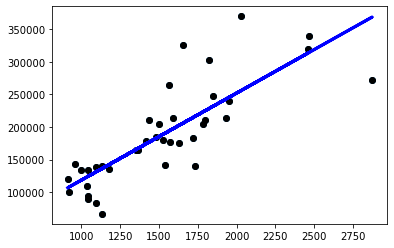

In [100]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train3 = train2.sample(frac=0.03)
X = train3[['GrLivArea']]
y = train3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

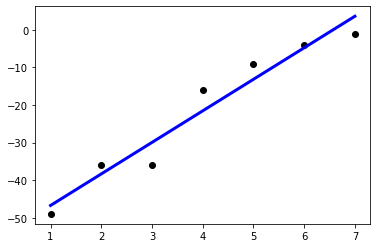

In [101]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)

model = linear_model.LinearRegression()
model = model.fit(X, y)

train_predictions = model.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, train_predictions, color='blue', linewidth=3)



[[ 7 49]
 [ 6 36]
 [ 5 25]
 [ 4 16]
 [ 3  9]
 [ 2  4]
 [ 1  1]]
[13.25 -0.61]
-62.4285714285714


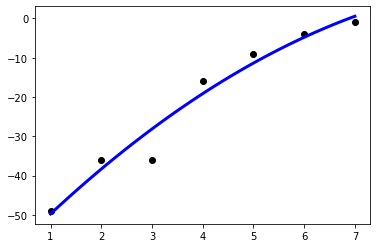

In [103]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2]
model = linear_model.LinearRegression()
model = model.fit(X, y)
X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(X)
print(model.coef_)
print(model.intercept_)

[3.93 7.14 6.47 -0.50 -6.86 4.27 -1.06 0.12 -0.01]
-62.50258416955434


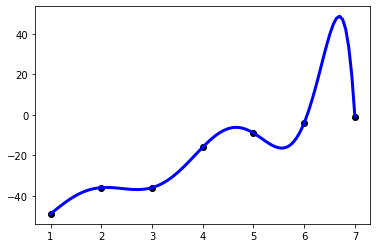

In [104]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.LinearRegression()
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### Ridge Regression

[0.17 0.32 0.34 0.12 -0.16 0.11 -0.03 0.00 -0.00]
-46.628314514269405


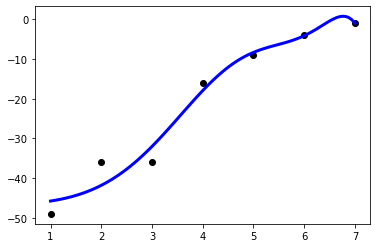

In [105]:
from sklearn.linear_model import Ridge
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.Ridge(alpha=10)
# play with the value of alpha and see its effect.
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### PolynomialFeatures method in Python

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X);

### Batch Gradient Descent Implementation

In [110]:
class MyLinearRegression:
    
    def cost(self, X, y, w, b):
        return np.sum(np.abs((np.dot(X,w) + b) - y))/X.shape[0]

    def __init__(self, n_iter = 100, learning_rate = 0.1, anim = False):
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.cost_array = []
        self.anim = anim
    def predict(self, X):
        
        preds = np.dot(X, self.w) + self.b
        return preds.reshape(-1)

    # Define the update function for the animation
    def update(self, i):
        y = np.dot(self.X,self.dw_array[i,:]) + self.b
        self.line.set_data(self.X, y)
        self.ax.set_title(f'Epoch {i}, Loss: {self.cost_array[i]:.4f}')
        return self.line,
   
    def fit(self, X, y):
        self.X = X
        self.y = y
        n_features = X.shape[1]
        self.dw_array = np.zeros([self.n_iter, n_features])
        self.b_array = np.zeros(self.n_iter)

        self.w = np.random.rand(n_features,1)
        self.b = np.random.rand()
        m = X.shape[0]
        y = y.reshape(y.size, 1)

        
        for iters in range(self.n_iter):
            c = self.cost(X,y,self.w,self.b)
            self.cost_array.append(c) 
            w_back = copy.deepcopy(self.w)
            for j in range(n_features): 
                dw = 0
                for i in range(m):
                    dw = dw + (y[i] - (np.dot(X[i].reshape([1,n_features]), w_back) + self.b)) * X[i,j]
                self.w[j] = w_back[j] + self.learning_rate * dw/m;
                self.dw_array[iters, j] = self.w[j]
            db = 0
            for i in range(m):
                db = db + (y[i] - (np.dot(X[i].reshape([1,n_features]), w_back) + self.b))
            self.b = self.b + self.learning_rate * db/m;
            self.b_array[iters] = self.b

            
        if self.anim == True:
            self.fig, self.ax = plt.subplots()
            self.ax.scatter(X, y,  color='black')
            self.line, = self.ax.plot([], [], lw=2)
                
            # Create the animation object and display it in the notebook
            self.anim = FuncAnimation(self.fig, self.update, frames=self.n_iter, interval=200)
            plt.show()


In [111]:
X = train.loc[:,['GrLivArea']]
y = train.loc[:,'SalePrice']
X = X.to_numpy()
y = y.to_numpy()
#scaler = MinMaxScaler()
#scaler = scaler.fit(X)
#X = scaler.transform(X)

<IPython.core.display.Javascript object>


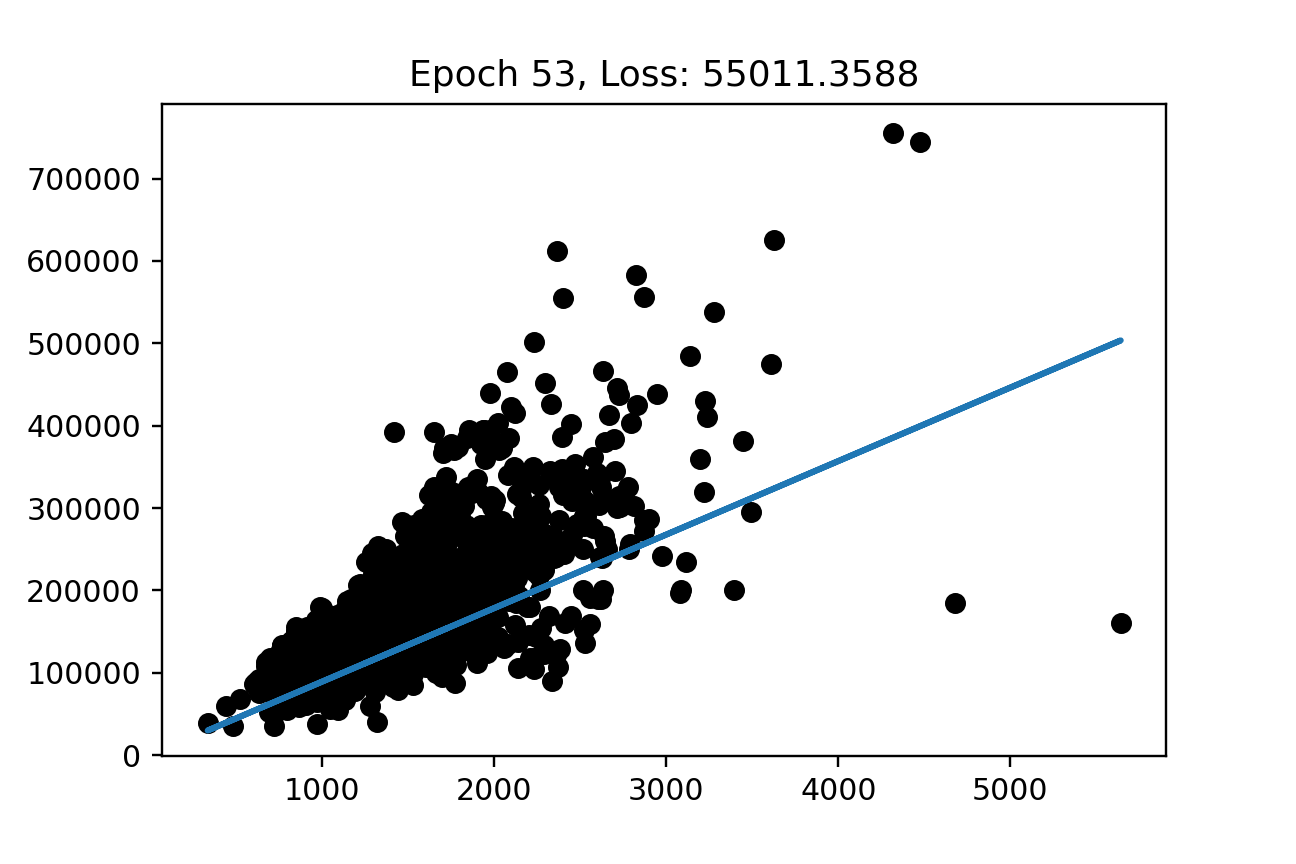

In [121]:
%matplotlib notebook
model = MyLinearRegression(n_iter = 100, learning_rate=0.00000001, anim=True)
model.fit(X,y)

In [ ]:
plt.plot(model.cost_array)

In [ ]:
from sklearn.metrics import mean_absolute_error
X = train.loc[:,['GrLivArea']]
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

reg1 = linear_model.LinearRegression()
reg2 = MyLinearRegression(n_iter=1000, learning_rate=0.0000001)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)

print(mean_absolute_error(y_test, reg1.predict(X_test)))
print(mean_absolute_error(y_test, reg2.predict(X_test)))
print(mean_absolute_error(y_train, reg2.predict(X_train)))


In [ ]:
print(reg1.coef_)
print(reg1.intercept_)

In [ ]:
print(reg2.w)
print(reg2.b)

In [ ]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, reg1.predict(X_test), color='blue', linewidth=3)
plt.plot(X_test, reg2.predict(X_test), color='red', linewidth=3)